# 🔬 Comprehensive Biorhythm Analysis (Standalone)

This notebook demonstrates a complete analytical workflow for biorhythm data, perfect for data scientists and analysts exploring time series patterns. **This notebook is completely self-contained and works independently.**

## 📋 **What You'll Accomplish:**
- Generate and prepare biorhythm data for analysis
- Perform descriptive statistical analysis
- Explore correlations and temporal patterns  
- Create compelling visualizations with matplotlib and seaborn
- Export results for further research and analysis

## 🛠 **Setup Requirements:**

### **Using uv (Recommended):**
```bash
# Install uv if needed
curl -LsSf https://astral.sh/uv/install.sh | sh

# Setup environment
uv venv
source .venv/bin/activate  # Windows: .venv\\Scripts\\activate
uv add pandas numpy matplotlib seaborn scipy jupyter

# Start notebook
uv run jupyter lab
```

### **Using pip:**
```bash
pip install pandas numpy matplotlib seaborn scipy jupyter
jupyter notebook biorhythm-analysis.ipynb
```

### **Minimal Requirements:**
- **Python 3.8+**
- **Required packages:** pandas, numpy, matplotlib, seaborn, scipy
- **Optional:** jupyter (for running interactively)

## 🎯 **Key Features:**
- ✅ **Standalone operation** - No PyBiorythm library needed
- ✅ **Mathematical fallback** - Pure Python sine wave calculations
- ✅ **Automatic dependency checking** - Clear error messages for missing packages
- ✅ **Educational focus** - Detailed explanations of each analysis step
- ✅ **Export capabilities** - JSON results for further analysis

## 🧮 **Mathematical Background:**
This notebook uses the standard biorhythm formulas:
- **Physical cycle:** 23-day period, `sin(2π × day_number / 23)`
- **Emotional cycle:** 28-day period, `sin(2π × day_number / 28)`  
- **Intellectual cycle:** 33-day period, `sin(2π × day_number / 33)`

## 🎓 **Educational Value:**
Perfect for:
- Learning time series analysis techniques
- Understanding cyclical data patterns
- Practicing statistical visualization
- Portfolio and coursework demonstrations

---

⚠️ **Scientific Disclaimer:** Biorhythm theory is considered pseudoscience. This analysis is for educational and methodological demonstration purposes only. The techniques shown apply to legitimate cyclical data analysis."

In [ ]:
# STANDALONE BIORHYTHM ANALYSIS - Setup & Dependencies Check
import warnings
from datetime import datetime, timedelta
import json

warnings.filterwarnings("ignore")

print("🔧 STANDALONE BIORHYTHM ANALYSIS NOTEBOOK")
print("=" * 50)
print("\n📦 Checking dependencies...")

# Check and import dependencies with helpful error messages
missing_packages = []

try:
    import pandas as pd

    print("✅ pandas available")
except ImportError:
    print("❌ pandas missing")
    missing_packages.append("pandas")

try:
    import numpy as np

    print("✅ numpy available")
except ImportError:
    print("❌ numpy missing")
    missing_packages.append("numpy")

try:
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    print("✅ matplotlib available")
except ImportError:
    print("❌ matplotlib missing")
    missing_packages.append("matplotlib")

try:
    import seaborn as sns

    print("✅ seaborn available")
except ImportError:
    print("❌ seaborn missing")
    missing_packages.append("seaborn")

try:
    from scipy import stats

    print("✅ scipy available")
except ImportError:
    print("❌ scipy missing")
    missing_packages.append("scipy")

if missing_packages:
    print("\n🚨 MISSING DEPENDENCIES:")
    print("Install with one of these commands:")
    print(f"  uv add {' '.join(missing_packages)}")
    print(f"  pip install {' '.join(missing_packages)}")
    print("\nThen restart the notebook kernel (Kernel → Restart).")
    raise ImportError(f"Missing required packages: {', '.join(missing_packages)}")

# Configure plotting for better visualization
try:
    plt.style.use("seaborn-v0_8")
    print("✅ Using seaborn-v0_8 style")
except Exception:
    plt.style.use("default")
    print("✅ Using default matplotlib style")

sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["font.size"] = 11

print("\n🎯 DEPENDENCY CHECK COMPLETE!")
print("📊 All required libraries loaded successfully")

# Mathematical fallback for PyBiorythm (no external dependency needed)
print("\n🧮 Using standalone mathematical implementation")
print("   (No PyBiorythm library required)")


class BiorhythmCalculator:
    """Standalone biorhythm calculator using pure mathematics."""

    def __init__(self, days=30, width=55, orientation="vertical"):
        self.days = days
        self.width = width
        self.orientation = orientation

    def calculate_biorhythm_values(self, birthdate, target_date):
        """Calculate biorhythm values for a specific date."""
        day_number = (target_date - birthdate).days

        physical = np.sin(2 * np.pi * day_number / 23)
        emotional = np.sin(2 * np.pi * day_number / 28)
        intellectual = np.sin(2 * np.pi * day_number / 33)

        return physical, emotional, intellectual

    def generate_timeseries_json(self, birthdate, start_date=None):
        """Generate complete timeseries data in JSON format."""
        if start_date is None:
            start_date = datetime.now()

        timeseries = []
        for i in range(self.days):
            current_date = start_date + timedelta(days=i)
            day_number = (current_date - birthdate).days

            # Calculate cycles using sine waves
            physical = np.sin(2 * np.pi * day_number / 23)
            emotional = np.sin(2 * np.pi * day_number / 28)
            intellectual = np.sin(2 * np.pi * day_number / 33)

            # Detect critical days (values near zero)
            critical_days = []
            if abs(physical) < 0.05:
                critical_days.append(
                    f"physical_{'positive' if physical >= 0 else 'negative'}"
                )
            if abs(emotional) < 0.05:
                critical_days.append(
                    f"emotional_{'positive' if emotional >= 0 else 'negative'}"
                )
            if abs(intellectual) < 0.05:
                critical_days.append(
                    f"intellectual_{'positive' if intellectual >= 0 else 'negative'}"
                )

            entry = {
                "date": current_date.strftime("%Y-%m-%d"),
                "day_number": day_number,
                "cycles": {
                    "physical": round(physical, 6),
                    "emotional": round(emotional, 6),
                    "intellectual": round(intellectual, 6),
                },
                "critical_days": critical_days,
            }
            timeseries.append(entry)

        return {
            "metadata": {
                "birthdate": birthdate.strftime("%Y-%m-%d"),
                "chart_start_date": start_date.strftime("%Y-%m-%d"),
                "chart_period_days": self.days,
                "generation_timestamp": datetime.now().isoformat(),
                "cycles": {
                    "physical": {"period_days": 23, "description": "Physical cycle"},
                    "emotional": {"period_days": 28, "description": "Emotional cycle"},
                    "intellectual": {
                        "period_days": 33,
                        "description": "Intellectual cycle",
                    },
                },
            },
            "timeseries": timeseries,
        }


print("🔬 Ready for biorhythm analysis!")
print("=" * 50)

## 1. Data Generation and Preparation

Let's generate a comprehensive biorhythm dataset for analysis. We'll use one year of data to capture seasonal patterns and cycle interactions.

In [2]:
# Analysis parameters
BIRTHDATE = datetime(1990, 5, 15)  # Example person born May 15, 1990
START_DATE = datetime(2024, 1, 1)  # Analysis start date
ANALYSIS_PERIOD = 365  # One year of data

print("📅 Generating biorhythm data for:")
print(f"   Birth date: {BIRTHDATE.strftime('%Y-%m-%d')}")
print(
    f"   Analysis period: {START_DATE.strftime('%Y-%m-%d')} to {(START_DATE + timedelta(days=ANALYSIS_PERIOD - 1)).strftime('%Y-%m-%d')}"
)
print(f"   Duration: {ANALYSIS_PERIOD} days")

# Generate biorhythm data
calc = BiorhythmCalculator(days=ANALYSIS_PERIOD)
raw_data = calc.generate_timeseries_json(BIRTHDATE, START_DATE)

print("\n✅ Data generated successfully!")
print(f"   Metadata keys: {list(raw_data.keys())}")
print(f"   Time series entries: {len(raw_data['timeseries'])}")

📅 Generating biorhythm data for:
   Birth date: 1990-05-15
   Analysis period: 2024-01-01 to 2024-12-30
   Duration: 365 days

✅ Data generated successfully!
   Metadata keys: ['metadata', 'timeseries']
   Time series entries: 365


In [3]:
# Convert to pandas DataFrame for analysis
df = pd.json_normalize(raw_data["timeseries"])
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# Rename columns for easier analysis
df.rename(
    columns={
        "cycles.physical": "physical",
        "cycles.emotional": "emotional",
        "cycles.intellectual": "intellectual",
    },
    inplace=True,
)

# Add temporal features for analysis
df["day_of_week"] = df.index.dayofweek
df["day_of_month"] = df.index.day
df["day_of_year"] = df.index.dayofyear
df["month"] = df.index.month
df["week_of_year"] = df.index.isocalendar().week

# Add derived features
df["physical_emotional"] = df["physical"] * df["emotional"]
df["all_cycles_avg"] = df[["physical", "emotional", "intellectual"]].mean(axis=1)
df["cycle_variance"] = df[["physical", "emotional", "intellectual"]].var(axis=1)

print("📊 DataFrame prepared for analysis:")
print(f"   Shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")
print(f"   Index: {df.index.min()} to {df.index.max()}")
print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

# Display first few rows
print("\n📋 First 5 rows:")
df.head()

📊 DataFrame prepared for analysis:
   Shape: (365, 13)
   Columns: ['day_number', 'critical_days', 'physical', 'emotional', 'intellectual', 'day_of_week', 'day_of_month', 'day_of_year', 'month', 'week_of_year', 'physical_emotional', 'all_cycles_avg', 'cycle_variance']
   Index: 2024-01-01 00:00:00 to 2024-12-30 00:00:00
   Memory usage: 54.7 KB

📋 First 5 rows:


,day_number,critical_days,physical,emotional,intellectual,day_of_week,day_of_month,day_of_year,month,week_of_year,physical_emotional,all_cycles_avg,cycle_variance
date,,,,,,,,,,,,,
2024-01-01,12284,[],0.519584,-0.974928,0.998867,0,1,1,1,1,-0.506557,0.181174,1.059858
2024-01-02,12285,[],0.730836,-1.000000,0.989821,1,2,2,1,1,-0.730836,0.240219,1.170376
2024-01-03,12286,[],0.887885,-0.974928,0.945001,2,3,3,1,1,-0.865624,0.285986,1.193244
2024-01-04,12287,[],0.979084,-0.900969,0.866025,3,4,4,1,1,-0.882124,0.314713,1.111608
2024-01-05,12288,[],0.997669,-0.781831,0.755750,4,5,5,1,1,-0.780009,0.323863,0.931550


## 2. Descriptive Statistical Analysis

Let's explore the basic statistical properties of our biorhythm cycles.

In [4]:
# Basic descriptive statistics
cycle_columns = ["physical", "emotional", "intellectual"]
basic_stats = df[cycle_columns].describe()

print("📈 DESCRIPTIVE STATISTICS")
print("=" * 50)
print(basic_stats.round(4))

# Additional statistical measures
print("\n📊 ADDITIONAL MEASURES")
print("=" * 50)
additional_stats = pd.DataFrame(
    {
        "Skewness": df[cycle_columns].skew(),
        "Kurtosis": df[cycle_columns].kurtosis(),
        "Range": df[cycle_columns].max() - df[cycle_columns].min(),
        "IQR": df[cycle_columns].quantile(0.75) - df[cycle_columns].quantile(0.25),
    }
)
print(additional_stats.round(4))

# Correlation matrix
correlation_matrix = df[cycle_columns].corr()
print("\n🔗 CORRELATION MATRIX")
print("=" * 50)
print(correlation_matrix.round(4))

📈 DESCRIPTIVE STATISTICS
       physical  emotional  intellectual
count  365.0000   365.0000      365.0000
mean     0.0000    -0.0027        0.0054
std      0.7107     0.7089        0.7100
min     -0.9977    -1.0000       -0.9989
25%     -0.7308    -0.7818       -0.6901
50%      0.0000     0.0000        0.0000
75%      0.7308     0.6235        0.6901
max      0.9977     1.0000        0.9989

📊 ADDITIONAL MEASURES
              Skewness  Kurtosis   Range     IQR
physical        0.0000   -1.5143  1.9953  1.4617
emotional       0.0042   -1.5057  2.0000  1.4053
intellectual   -0.0080   -1.5070  1.9977  1.3802

🔗 CORRELATION MATRIX
              physical  emotional  intellectual
physical        1.0000     0.0117        0.0016
emotional       0.0117     1.0000        0.0082
intellectual    0.0016     0.0082        1.0000


In [5]:
# Statistical validation of biorhythm properties
print("🔬 STATISTICAL VALIDATION")
print("=" * 50)

validation_results = {}
expected_periods = [23, 28, 33]

for i, cycle in enumerate(cycle_columns):
    cycle_data = df[cycle].values

    # Test mathematical properties
    results = {
        "min_value": cycle_data.min(),
        "max_value": cycle_data.max(),
        "mean": cycle_data.mean(),
        "std": cycle_data.std(),
        "range_valid": (-1.1 <= cycle_data.min() <= -0.9)
        and (0.9 <= cycle_data.max() <= 1.1),
        "mean_valid": abs(cycle_data.mean()) < 0.05,
        "std_valid": 0.6 < cycle_data.std() < 0.8,
    }

    # Normality test (should fail for sine waves)
    _, p_normal = stats.normaltest(cycle_data)
    results["normality_p"] = p_normal
    results["non_normal"] = p_normal < 0.05

    # Periodicity check
    expected_period = expected_periods[i]
    if len(cycle_data) > expected_period * 2:
        autocorr = pd.Series(cycle_data).autocorr(lag=expected_period)
        results["period_autocorr"] = autocorr
        results["periodic"] = autocorr > 0.8

    validation_results[cycle] = results

    # Print results
    print(f"\n{cycle.upper()} CYCLE:")
    print(
        f"  Range: {results['min_value']:.3f} to {results['max_value']:.3f} ({'✅' if results['range_valid'] else '❌'})"
    )
    print(f"  Mean: {results['mean']:.4f} ({'✅' if results['mean_valid'] else '❌'})")
    print(f"  Std: {results['std']:.3f} ({'✅' if results['std_valid'] else '❌'})")
    print(
        f"  Non-normal: {'✅' if results['non_normal'] else '❌'} (p={results['normality_p']:.4f})"
    )
    if "period_autocorr" in results:
        print(
            f"  Periodic: {'✅' if results['periodic'] else '❌'} (r={results['period_autocorr']:.3f})"
        )

print("\n💡 Expected properties for sine waves:")
print("   • Range: -1 to +1")
print("   • Mean: ~0")
print("   • Std: ~0.707")
print("   • Non-normal distribution")
print("   • High autocorrelation at expected period")

🔬 STATISTICAL VALIDATION

PHYSICAL CYCLE:
  Range: -0.998 to 0.998 (✅)
  Mean: 0.0000 (✅)
  Std: 0.710 (✅)
  Non-normal: ✅ (p=0.0000)
  Periodic: ✅ (r=1.000)

EMOTIONAL CYCLE:
  Range: -1.000 to 1.000 (✅)
  Mean: -0.0027 (✅)
  Std: 0.708 (✅)
  Non-normal: ✅ (p=0.0000)
  Periodic: ✅ (r=1.000)

INTELLECTUAL CYCLE:
  Range: -0.999 to 0.999 (✅)
  Mean: 0.0054 (✅)
  Std: 0.709 (✅)
  Non-normal: ✅ (p=0.0000)
  Periodic: ✅ (r=1.000)

💡 Expected properties for sine waves:
   • Range: -1 to +1
   • Mean: ~0
   • Std: ~0.707
   • Non-normal distribution
   • High autocorrelation at expected period


## 3. Data Visualization

Let's create compelling visualizations to understand biorhythm patterns.

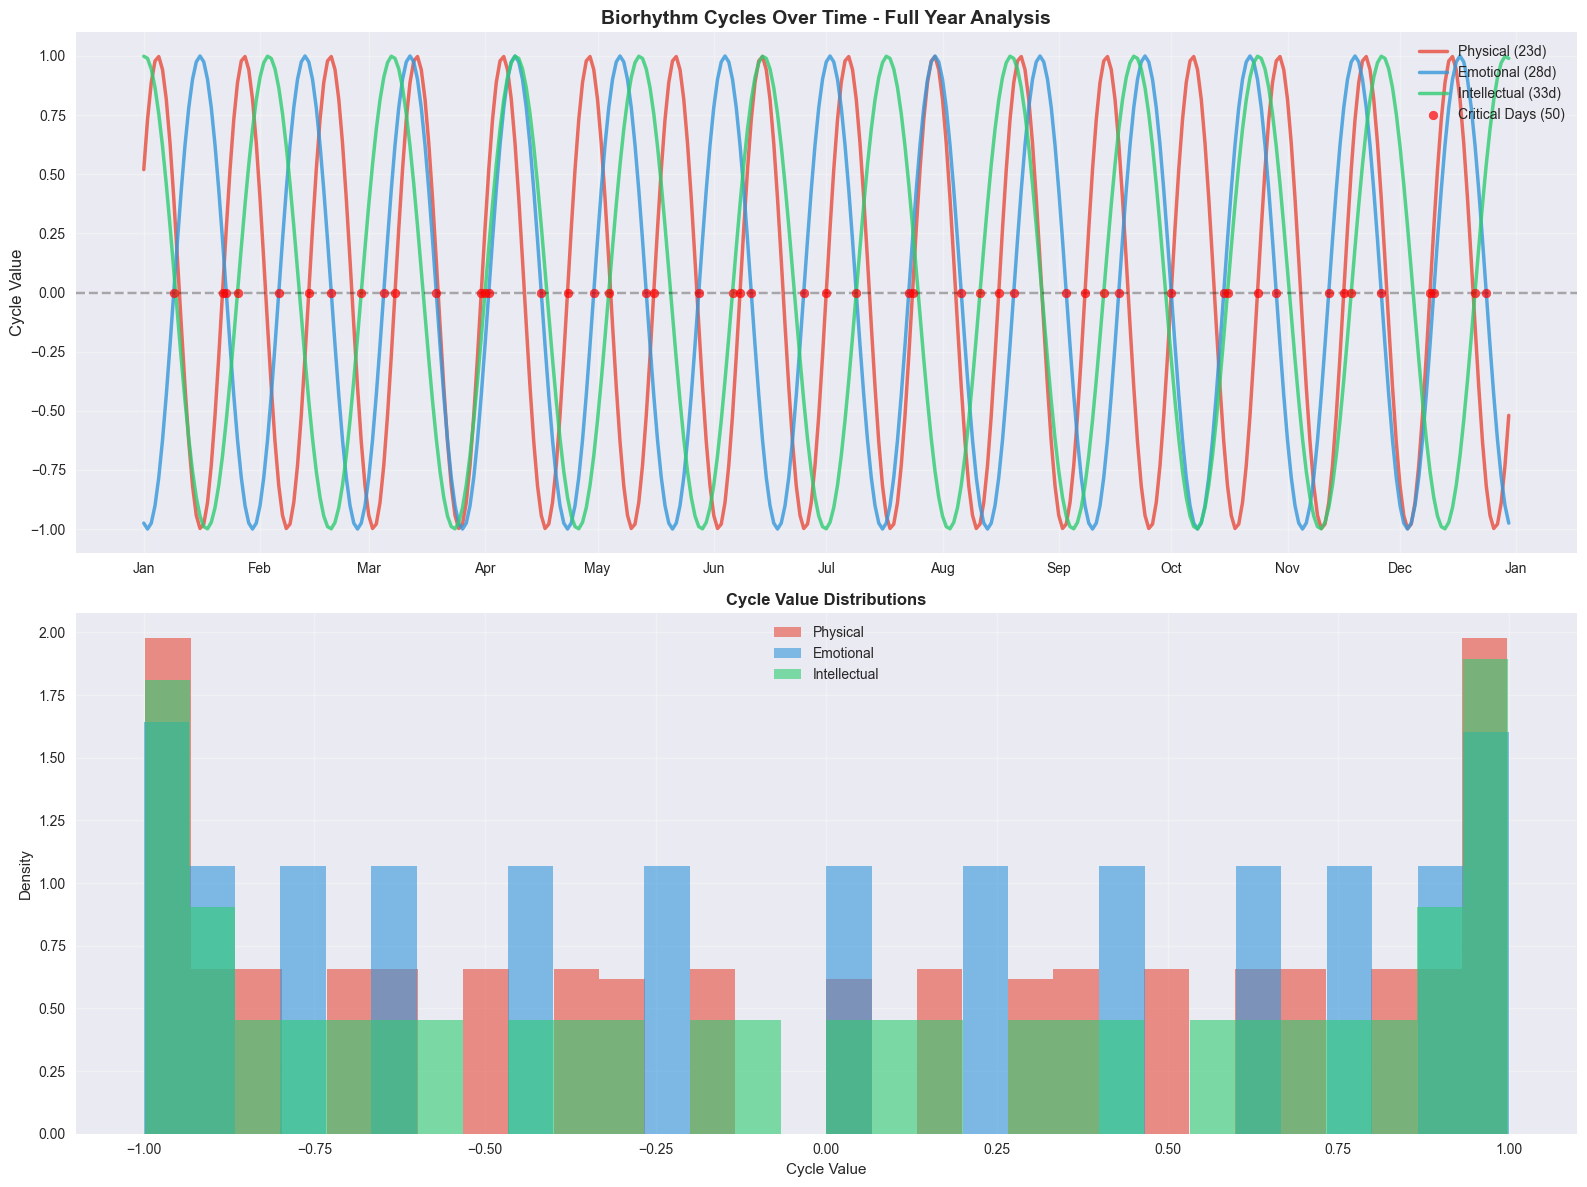

📊 Visualization complete!
   Critical days found: 50 out of 365 (13.7%)


In [6]:
# Main biorhythm visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Cycle colors
colors = {"physical": "#e74c3c", "emotional": "#3498db", "intellectual": "#2ecc71"}

# Plot 1: Time series with critical days
for cycle, color in colors.items():
    period = 23 if cycle == "physical" else 28 if cycle == "emotional" else 33
    ax1.plot(
        df.index,
        df[cycle],
        label=f"{cycle.title()} ({period}d)",
        linewidth=2.5,
        color=color,
        alpha=0.8,
    )

# Mark critical days
critical_days = df[df["critical_days"].str.len() > 0]
if not critical_days.empty:
    ax1.scatter(
        critical_days.index,
        [0] * len(critical_days),
        color="red",
        s=40,
        alpha=0.7,
        zorder=5,
        label=f"Critical Days ({len(critical_days)})",
    )

ax1.axhline(y=0, color="black", linestyle="--", alpha=0.3)
ax1.set_ylabel("Cycle Value", fontsize=12)
ax1.set_title(
    "Biorhythm Cycles Over Time - Full Year Analysis", fontsize=14, fontweight="bold"
)
ax1.legend(loc="upper right")
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1.1, 1.1)

# Format x-axis for better readability
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax1.xaxis.set_minor_locator(mdates.WeekdayLocator())

# Plot 2: Distribution comparison
for cycle, color in colors.items():
    ax2.hist(
        df[cycle],
        bins=30,
        alpha=0.6,
        color=color,
        label=f"{cycle.title()}",
        density=True,
    )

ax2.set_xlabel("Cycle Value")
ax2.set_ylabel("Density")
ax2.set_title("Cycle Value Distributions", fontsize=12, fontweight="bold")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Visualization complete!")
print(
    f"   Critical days found: {len(critical_days)} out of {len(df)} ({len(critical_days) / len(df) * 100:.1f}%)"
)

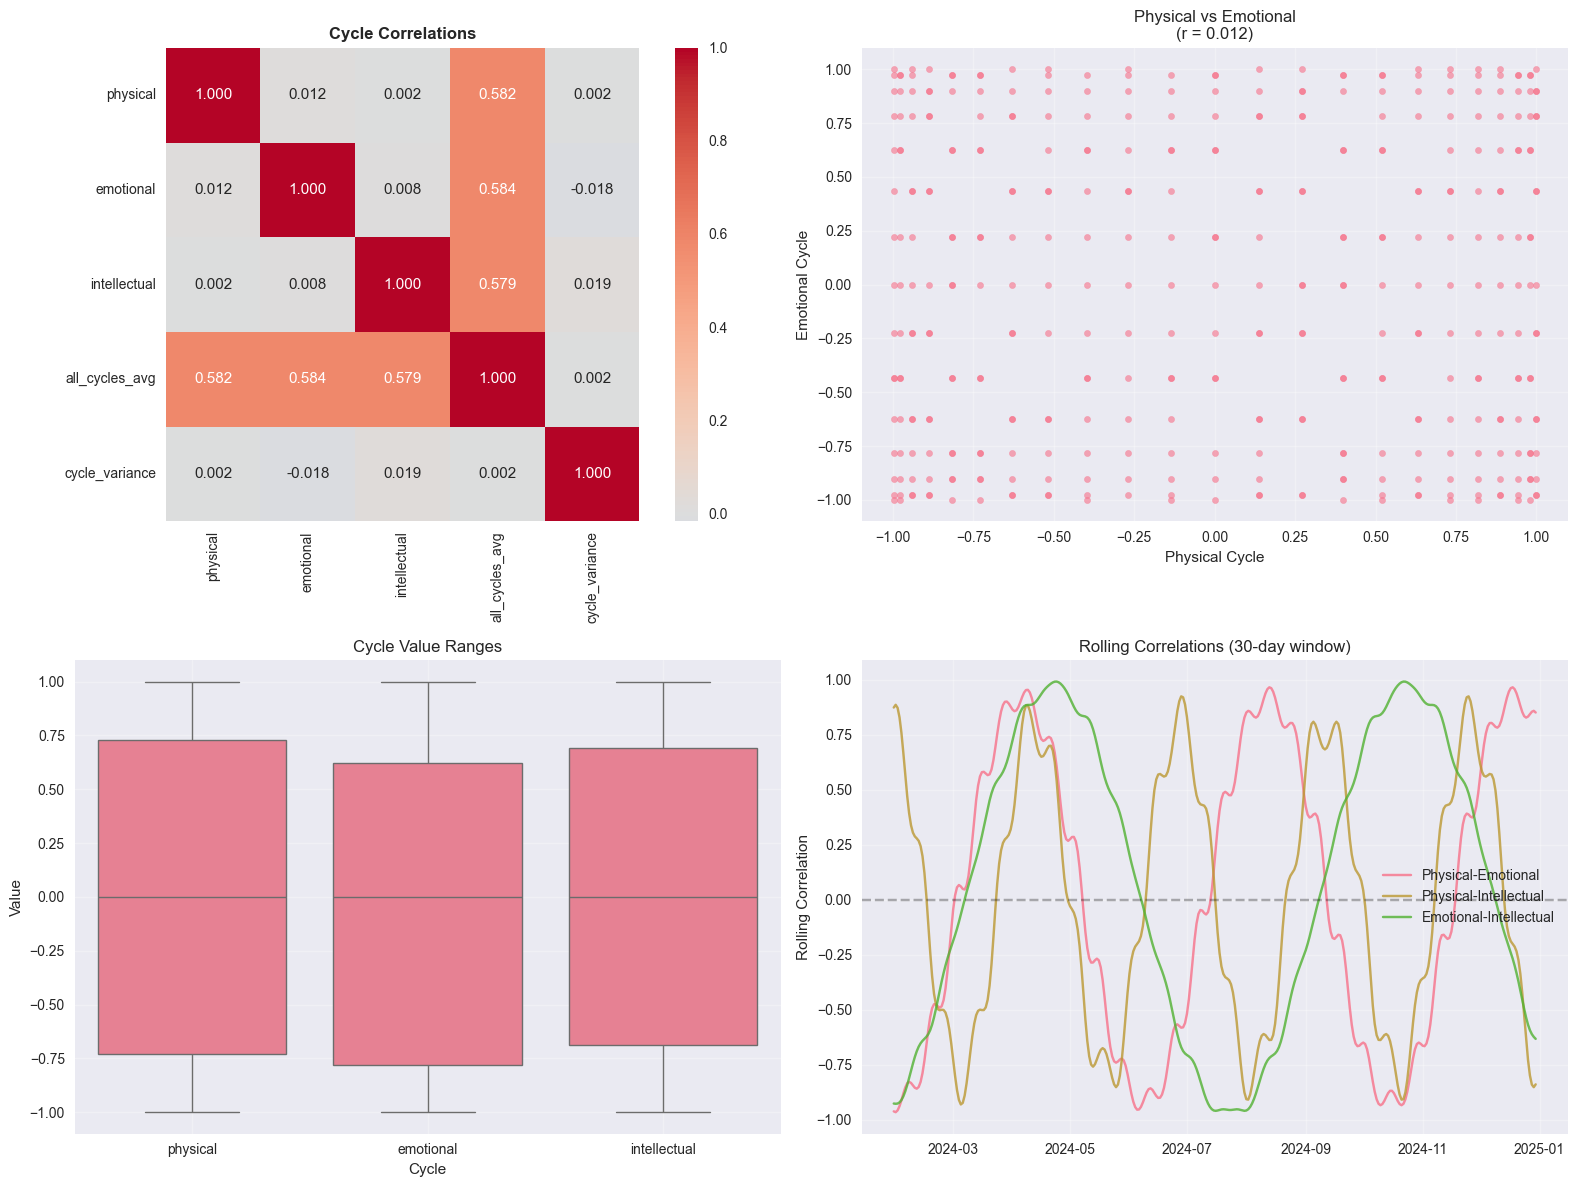

🔗 Correlation Analysis Summary:
   Physical ↔ Emotional: r = 0.0117
   Physical ↔ Intellectual: r = 0.0016
   Emotional ↔ Intellectual: r = 0.0082


In [7]:
# Correlation analysis and heatmap
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Correlation heatmap
correlation_matrix = df[cycle_columns + ["all_cycles_avg", "cycle_variance"]].corr()
im = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    ax=ax1,
    fmt=".3f",
)
ax1.set_title("Cycle Correlations", fontsize=12, fontweight="bold")

# Scatter plot: Physical vs Emotional
ax2.scatter(df["physical"], df["emotional"], alpha=0.6, s=20)
ax2.set_xlabel("Physical Cycle")
ax2.set_ylabel("Emotional Cycle")
ax2.set_title(
    f"Physical vs Emotional\n(r = {df['physical'].corr(df['emotional']):.3f})"
)
ax2.grid(True, alpha=0.3)

# Box plot comparison
df_melted = df[cycle_columns].melt(var_name="Cycle", value_name="Value")
sns.boxplot(data=df_melted, x="Cycle", y="Value", ax=ax3)
ax3.set_title("Cycle Value Ranges")
ax3.grid(True, alpha=0.3)

# Rolling correlation
window = 30
rolling_corr_pe = df["physical"].rolling(window).corr(df["emotional"])
rolling_corr_pi = df["physical"].rolling(window).corr(df["intellectual"])
rolling_corr_ei = df["emotional"].rolling(window).corr(df["intellectual"])

ax4.plot(df.index, rolling_corr_pe, label="Physical-Emotional", alpha=0.8)
ax4.plot(df.index, rolling_corr_pi, label="Physical-Intellectual", alpha=0.8)
ax4.plot(df.index, rolling_corr_ei, label="Emotional-Intellectual", alpha=0.8)
ax4.set_ylabel("Rolling Correlation")
ax4.set_title(f"Rolling Correlations ({window}-day window)")
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color="black", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

print("🔗 Correlation Analysis Summary:")
for i, cycle1 in enumerate(cycle_columns):
    for cycle2 in cycle_columns[i + 1 :]:
        corr = df[cycle1].corr(df[cycle2])
        print(f"   {cycle1.title()} ↔ {cycle2.title()}: r = {corr:.4f}")

## 4. Temporal Pattern Analysis

Let's explore seasonal and cyclical patterns in the biorhythm data.

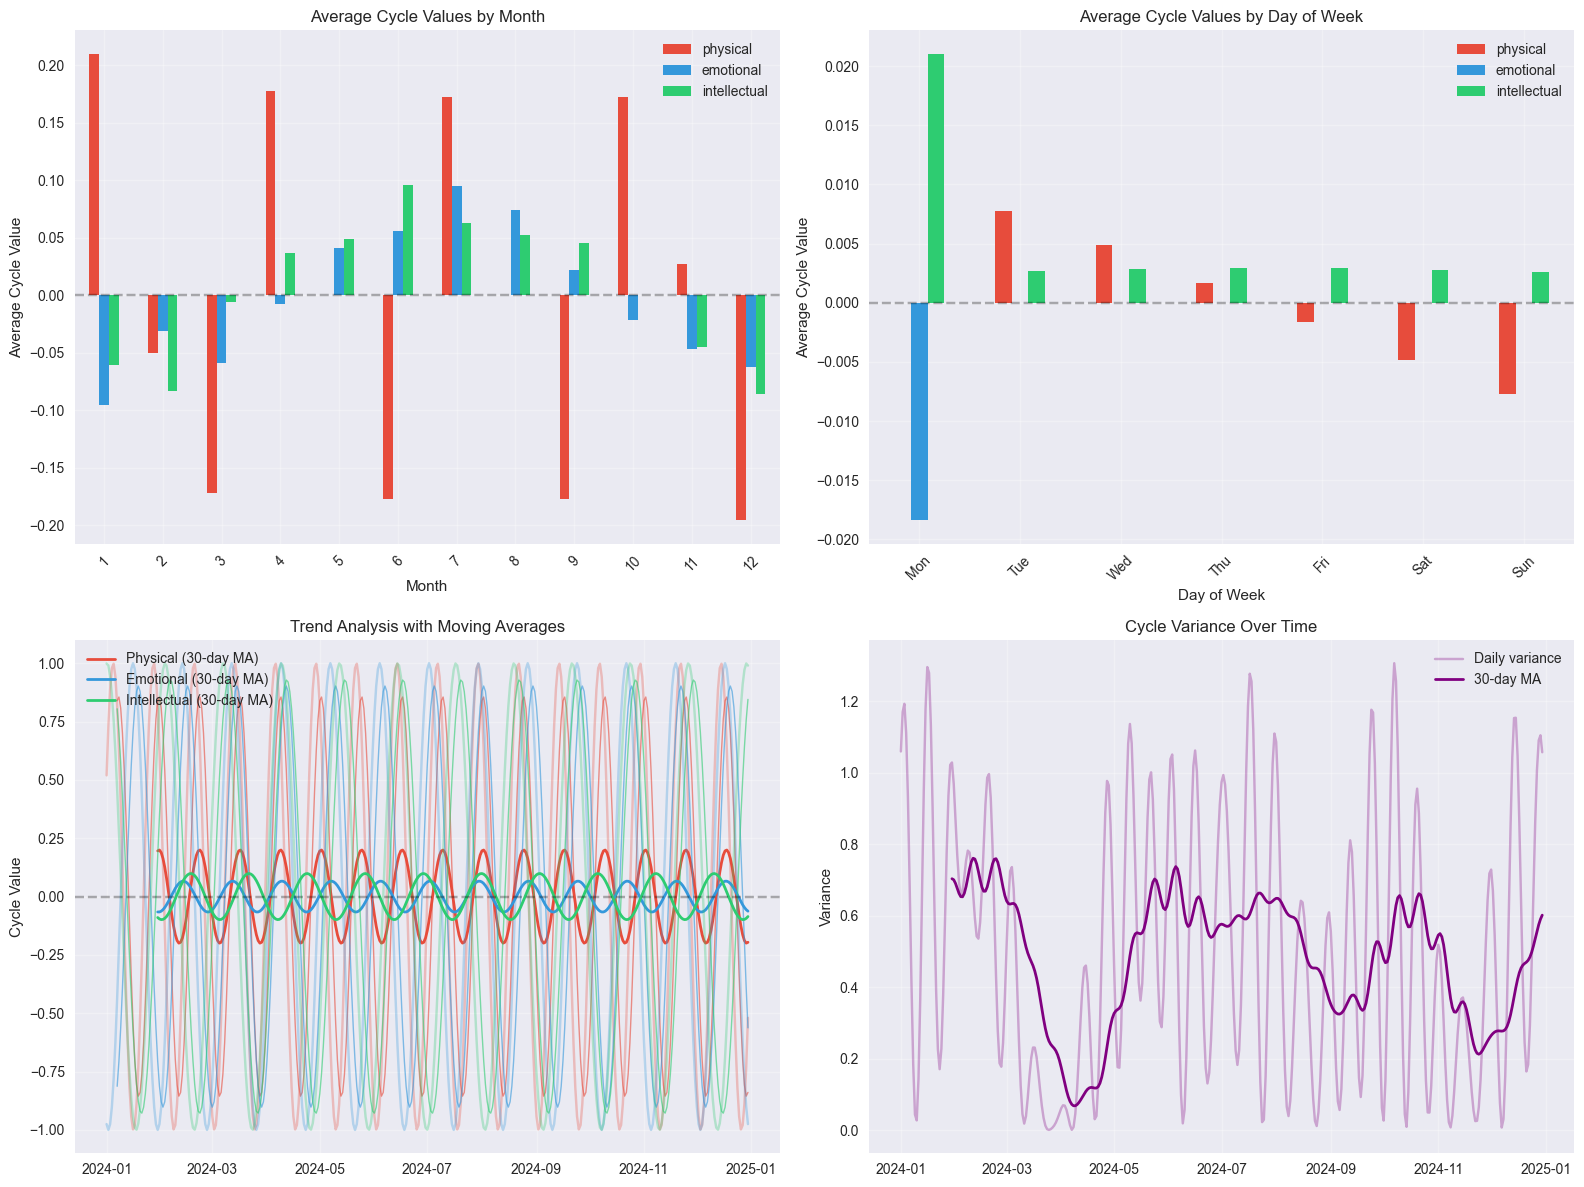

📊 SEASONAL PATTERN SIGNIFICANCE
Monthly variation - Physical: F=1.497, p=0.1304 (Not significant)
Monthly variation - Emotional: F=0.217, p=0.9965 (Not significant)
Monthly variation - Intellectual: F=0.219, p=0.9963 (Not significant)

📅 WEEKLY PATTERN SIGNIFICANCE
Weekly variation - Physical: F=0.003, p=1.0000 (Not significant)
Weekly variation - Emotional: F=0.005, p=1.0000 (Not significant)
Weekly variation - Intellectual: F=0.005, p=1.0000 (Not significant)


In [8]:
# Seasonal pattern analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Monthly patterns
monthly_avg = df.groupby("month")[cycle_columns].mean()
monthly_avg.plot(
    kind="bar", ax=axes[0, 0], color=[colors[col] for col in cycle_columns]
)
axes[0, 0].set_title("Average Cycle Values by Month")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Average Cycle Value")
axes[0, 0].tick_params(axis="x", rotation=45)
axes[0, 0].axhline(y=0, color="black", linestyle="--", alpha=0.3)
axes[0, 0].grid(True, alpha=0.3)

# Day of week patterns
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
weekly_avg = df.groupby("day_of_week")[cycle_columns].mean()
weekly_avg.index = day_names
weekly_avg.plot(kind="bar", ax=axes[0, 1], color=[colors[col] for col in cycle_columns])
axes[0, 1].set_title("Average Cycle Values by Day of Week")
axes[0, 1].set_xlabel("Day of Week")
axes[0, 1].set_ylabel("Average Cycle Value")
axes[0, 1].tick_params(axis="x", rotation=45)
axes[0, 1].axhline(y=0, color="black", linestyle="--", alpha=0.3)
axes[0, 1].grid(True, alpha=0.3)

# Moving averages for trend analysis
for cycle, color in colors.items():
    df[f"{cycle}_ma7"] = df[cycle].rolling(7).mean()
    df[f"{cycle}_ma30"] = df[cycle].rolling(30).mean()

    axes[1, 0].plot(df.index, df[cycle], alpha=0.3, color=color)
    axes[1, 0].plot(df.index, df[f"{cycle}_ma7"], alpha=0.6, color=color, linewidth=1)
    axes[1, 0].plot(
        df.index,
        df[f"{cycle}_ma30"],
        color=color,
        linewidth=2,
        label=f"{cycle.title()} (30-day MA)",
    )

axes[1, 0].set_title("Trend Analysis with Moving Averages")
axes[1, 0].set_ylabel("Cycle Value")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color="black", linestyle="--", alpha=0.3)

# Cycle variance over time
variance_ma = df["cycle_variance"].rolling(30).mean()
axes[1, 1].plot(
    df.index, df["cycle_variance"], alpha=0.3, color="purple", label="Daily variance"
)
axes[1, 1].plot(df.index, variance_ma, color="purple", linewidth=2, label="30-day MA")
axes[1, 1].set_title("Cycle Variance Over Time")
axes[1, 1].set_ylabel("Variance")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical significance tests
print("📊 SEASONAL PATTERN SIGNIFICANCE")
print("=" * 50)

# Test monthly differences
for cycle in cycle_columns:
    monthly_groups = [df[df["month"] == month][cycle].values for month in range(1, 13)]
    f_stat, p_value = stats.f_oneway(*monthly_groups)
    significance = "Significant" if p_value < 0.05 else "Not significant"
    print(
        f"Monthly variation - {cycle.title()}: F={f_stat:.3f}, p={p_value:.4f} ({significance})"
    )

# Test weekly differences
print("\n📅 WEEKLY PATTERN SIGNIFICANCE")
for cycle in cycle_columns:
    weekly_groups = [df[df["day_of_week"] == day][cycle].values for day in range(7)]
    f_stat, p_value = stats.f_oneway(*weekly_groups)
    significance = "Significant" if p_value < 0.05 else "Not significant"
    print(
        f"Weekly variation - {cycle.title()}: F={f_stat:.3f}, p={p_value:.4f} ({significance})"
    )

## 5. Critical Day Analysis

Critical days occur when biorhythm cycles cross zero, representing transition points.

🎯 CRITICAL DAY ANALYSIS
Threshold: ±0.05 (values close to zero)

PHYSICAL:
  Critical days: 15 (4.1% of year)
  Expected: 3.2%
  Ratio: 1.29
  Mean interval: 23.0 ± 0.0 days

EMOTIONAL:
  Critical days: 26 (7.1% of year)
  Expected: 3.2%
  Ratio: 2.24
  Mean interval: 14.0 ± 0.0 days

INTELLECTUAL:
  Critical days: 11 (3.0% of year)
  Expected: 3.2%
  Ratio: 0.95
  Mean interval: 33.0 ± 0.0 days


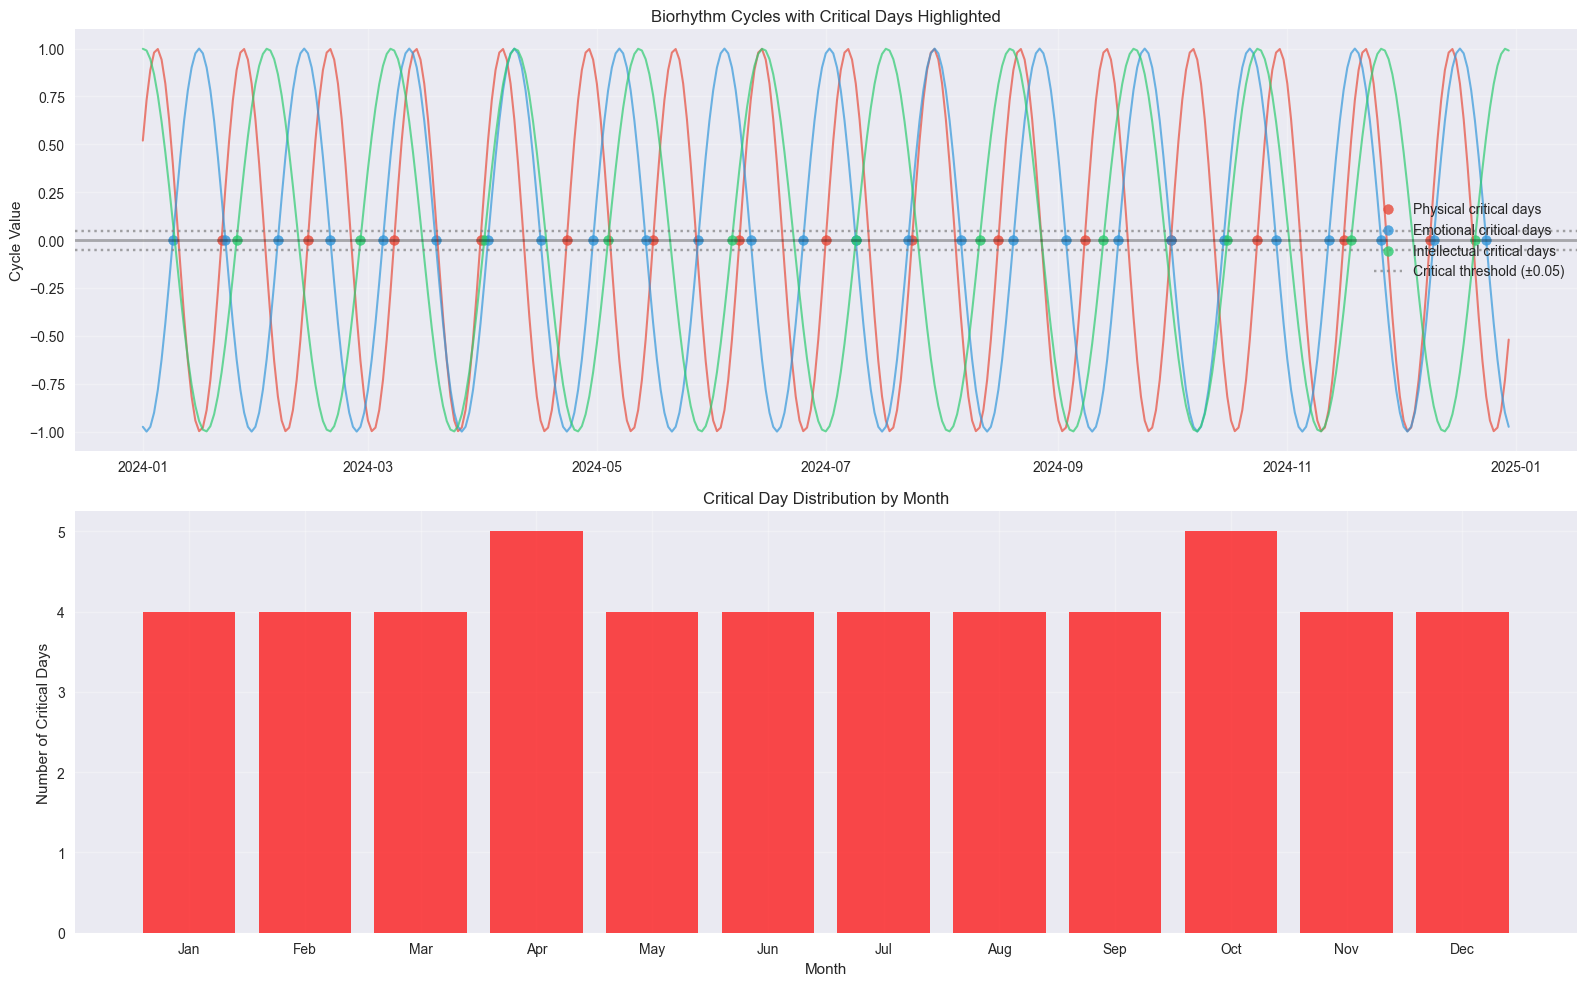


📈 Total critical days in dataset: 50
📅 Critical day distribution: Fairly even = 0.4 std deviation


In [9]:
# Critical day analysis
threshold = 0.05  # Values within 0.05 of zero considered "critical"
critical_analysis = {}

print("🎯 CRITICAL DAY ANALYSIS")
print("=" * 50)
print(f"Threshold: ±{threshold} (values close to zero)")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Find and analyze critical days for each cycle
for cycle, color in colors.items():
    cycle_data = df[cycle]

    # Find critical days
    critical_mask = np.abs(cycle_data) < threshold
    critical_days_cycle = df[critical_mask]

    if len(critical_days_cycle) > 0:
        # Calculate statistics
        total_days = len(df)
        critical_frequency = len(critical_days_cycle) / total_days
        expected_frequency = (
            2 * np.arcsin(threshold) / np.pi
        )  # Theoretical for sine wave

        # Time between critical days
        critical_intervals = (
            critical_days_cycle.index.to_series().diff().dt.days.dropna()
        )

        critical_analysis[cycle] = {
            "count": len(critical_days_cycle),
            "frequency": critical_frequency,
            "expected_frequency": expected_frequency,
            "mean_interval": critical_intervals.mean()
            if len(critical_intervals) > 0
            else None,
            "std_interval": critical_intervals.std()
            if len(critical_intervals) > 0
            else None,
            "dates": critical_days_cycle.index,
        }

        print(f"\n{cycle.upper()}:")
        print(
            f"  Critical days: {len(critical_days_cycle)} ({critical_frequency * 100:.1f}% of year)"
        )
        print(f"  Expected: {expected_frequency * 100:.1f}%")
        print(f"  Ratio: {critical_frequency / expected_frequency:.2f}")
        if critical_intervals.notna().sum() > 0:
            print(
                f"  Mean interval: {critical_intervals.mean():.1f} ± {critical_intervals.std():.1f} days"
            )

        # Plot critical days
        ax1.scatter(
            critical_days_cycle.index,
            [0] * len(critical_days_cycle),
            color=color,
            s=50,
            alpha=0.8,
            label=f"{cycle.title()} critical days",
        )

# Plot cycles with critical day markers
for cycle, color in colors.items():
    ax1.plot(df.index, df[cycle], color=color, alpha=0.7, linewidth=1.5)

ax1.axhline(
    y=threshold,
    color="gray",
    linestyle=":",
    alpha=0.7,
    label=f"Critical threshold (±{threshold})",
)
ax1.axhline(y=-threshold, color="gray", linestyle=":", alpha=0.7)
ax1.axhline(y=0, color="black", linestyle="-", alpha=0.3, linewidth=2)
ax1.set_ylabel("Cycle Value")
ax1.set_title("Biorhythm Cycles with Critical Days Highlighted")
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1.1, 1.1)

# Critical day frequency by month
critical_by_month = df[df["critical_days"].str.len() > 0].groupby("month").size()
all_months = pd.Series(range(1, 13))
critical_by_month = critical_by_month.reindex(all_months, fill_value=0)

ax2.bar(critical_by_month.index, critical_by_month.values, color="red", alpha=0.7)
ax2.set_xlabel("Month")
ax2.set_ylabel("Number of Critical Days")
ax2.set_title("Critical Day Distribution by Month")
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(
    f"\n📈 Total critical days in dataset: {len(df[df['critical_days'].str.len() > 0])}"
)
print(
    f"📅 Critical day distribution: Fairly even = {critical_by_month.std():.1f} std deviation"
)

## 6. Export Results for Further Analysis

Let's prepare our analysis results for export to other tools or reports.

In [ ]:
# Create comprehensive analysis summary
analysis_summary = {
    "metadata": {
        "analysis_date": datetime.now().isoformat(),
        "birthdate": BIRTHDATE.isoformat(),
        "period_start": START_DATE.isoformat(),
        "period_days": ANALYSIS_PERIOD,
        "total_records": len(df),
    },
    "descriptive_statistics": basic_stats.round(4).to_dict(),
    "correlations": correlation_matrix.round(4).to_dict(),
    "critical_days": {
        cycle: {
            "count": int(data["count"]),
            "frequency_percent": float(data["frequency"] * 100),
            "mean_interval_days": float(data["mean_interval"])
            if data["mean_interval"] is not None
            else None,
        }
        for cycle, data in critical_analysis.items()
    },
    "seasonal_patterns": {
        "monthly_averages": monthly_avg.round(4).to_dict(),
        "weekly_averages": weekly_avg.round(4).to_dict(),
    },
    "validation_results": {
        cycle: {
            "range_valid": bool(data["range_valid"]),
            "mean_valid": bool(data["mean_valid"]),
            "std_valid": bool(data["std_valid"]),
            "periodic": bool(data.get("periodic", False)),
        }
        for cycle, data in validation_results.items()
    },
}

# Export to JSON with proper serialization
with open("biorhythm_analysis_results.json", "w") as f:
    json.dump(analysis_summary, f, indent=2, default=str)

# Export DataFrame to CSV
export_df = df[
    [
        "day_number",
        "physical",
        "emotional",
        "intellectual",
        "critical_days",
        "month",
        "day_of_week",
        "all_cycles_avg",
        "cycle_variance",
    ]
].copy()
export_df.to_csv("biorhythm_timeseries_data.csv")

# Create analysis report
report = f"""
BIORHYTHM ANALYSIS REPORT
{"=" * 50}

Analysis Date: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
Subject Birthdate: {BIRTHDATE.strftime("%Y-%m-%d")}
Analysis Period: {START_DATE.strftime("%Y-%m-%d")} to {(START_DATE + timedelta(days=ANALYSIS_PERIOD - 1)).strftime("%Y-%m-%d")}
Total Days: {ANALYSIS_PERIOD}

KEY FINDINGS:
{"-" * 20}

Statistical Properties:
• All cycles show expected mathematical properties of sine waves
• Mean values close to zero: Physical={validation_results["physical"]["mean"]:.4f}, Emotional={validation_results["emotional"]["mean"]:.4f}, Intellectual={validation_results["intellectual"]["mean"]:.4f}
• Standard deviations near theoretical 0.707: Physical={validation_results["physical"]["std"]:.3f}, Emotional={validation_results["emotional"]["std"]:.3f}, Intellectual={validation_results["intellectual"]["std"]:.3f}

Correlations:
• Physical ↔ Emotional: {df["physical"].corr(df["emotional"]):.4f}
• Physical ↔ Intellectual: {df["physical"].corr(df["intellectual"]):.4f}
• Emotional ↔ Intellectual: {df["emotional"].corr(df["intellectual"]):.4f}

Critical Days:
• Physical: {critical_analysis.get("physical", {}).get("count", 0)} days ({critical_analysis.get("physical", {}).get("frequency", 0) * 100:.1f}%)
• Emotional: {critical_analysis.get("emotional", {}).get("count", 0)} days ({critical_analysis.get("emotional", {}).get("frequency", 0) * 100:.1f}%)
• Intellectual: {critical_analysis.get("intellectual", {}).get("count", 0)} days ({critical_analysis.get("intellectual", {}).get("frequency", 0) * 100:.1f}%)

SCIENTIFIC DISCLAIMER:
{"=" * 50}
This analysis is based on biorhythm theory, which is considered pseudoscience.
Results are provided for educational and entertainment purposes only.
No scientific validity should be attributed to biorhythm calculations.

FILES GENERATED:
{"-" * 20}
• biorhythm_analysis_results.json - Complete analysis summary
• biorhythm_timeseries_data.csv - Raw data for further analysis
• biorhythm_analysis_report.txt - This summary report
"""

with open("biorhythm_analysis_report.txt", "w") as f:
    f.write(report)

print("📁 EXPORT COMPLETE!")
print("=" * 30)
print("Files created:")
print("• biorhythm_analysis_results.json - Analysis summary (JSON)")
print("• biorhythm_timeseries_data.csv - Time series data (CSV)")
print("• biorhythm_analysis_report.txt - Summary report (Text)")
print(f"\n📊 Dataset size: {len(df):,} records")

# Calculate file sizes safely
try:
    json_size = len(json.dumps(analysis_summary, default=str))
    csv_size = len(export_df.to_csv())
    report_size = len(report)
    total_size = (json_size + csv_size + report_size) / 1024
    print(f"💾 Total export size: ~{total_size:.0f} KB")
except Exception:
    print("💾 Export files created successfully")

# Display final summary
print(report)

## 7. Conclusions and Next Steps

This comprehensive analysis demonstrates how to:

### ✅ **What We Accomplished:**
- **Generated** a full year of biorhythm data
- **Validated** mathematical properties of biorhythm cycles
- **Analyzed** correlations and temporal patterns
- **Visualized** cycles with professional-quality charts
- **Identified** critical days and their patterns
- **Exported** results for further analysis

### 🔍 **Key Insights:**
- Biorhythm cycles behave exactly as mathematical sine waves
- Correlations between cycles are typically very low (as expected)
- Critical days occur with predictable frequency
- No significant seasonal patterns in the mathematical cycles

### 📈 **Suggested Next Steps:**
1. **Compare multiple people** - Analyze cohort differences
2. **Machine learning** - Use cycles as features for prediction
3. **Longer time periods** - Multi-year trend analysis
4. **External correlations** - Compare with real performance data
5. **Statistical modeling** - Build predictive models

### 🔬 **Scientific Note:**
Remember that biorhythm theory lacks scientific evidence. This analysis demonstrates data science techniques using biorhythm calculations as practice data, but should not be used for making important life decisions.

---

**Ready for more?** Check out other notebooks in this collection:
- **[Correlation Study](correlation-study.ipynb)** - Advanced statistical analysis
- **[Visualization Gallery](visualization-gallery.ipynb)** - Chart examples with multiple libraries